## Part Time Data Science 07 class: Phase 1 Project
### Project by: Nicholas Kirui
### Date of Submission: 03 June 2024

## Project Overview
For this project, I will use exploratory data analysis to generate insights for a business stakeholder based on datasets provided.

### Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## The Data Understanding
The data was collected from various locations and the different files have different formats. 
1. compressed CSV (comma-separated values) files:
       - bom.movie_gross
       - tn.movie_budgets
       - tmdb.movies
2. TSV (tab-separated values) files:
       - rt.movie_info.tsv
       - rt.reviews.tsv
3. Data located in a SQLite database:
    - im.db  
    - entiry relationship diagram: movie_data_erd
    - Table Names
        - movie_basics
        - directors
        - known_for
        - movie_akas
        - movie_ratings
        - persons
        - principals
        - writers

    - Most relevant tables:
        - ## Movie_basics
            - Table contains the basic information of the movies including the genres
        - ## movie_ratings
            - Table shows the ratings of the movies

______________________________________________________________________________________________________________________________________________________________

### Data preparation
- Import the necessary libraries
- Initial exploratory data analysis of all the datasets

In [1]:
import os
import sqlite3
import pandas as pd 
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

## Explore the in.db sqlite database
- Read the sqlite database using pandas dataframe
- use queries to get data from the relevant tables

In [2]:
im_path = os.path.join('im.db')

# Open up a connection
conn = sqlite3.connect(im_path)
# Initialize a cursor
cursor = conn.cursor()

In [3]:
table_name_query = """SELECT name
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
movie_basics_query = ''' 

SELECT *
FROM movie_basics

'''

# Use the line below to check your query's output
pd.read_sql(movie_basics_query, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:

movie_ratings_query = ''' 

SELECT *
FROM movie_ratings

'''

# Use the line below to check your query's output
pd.read_sql(movie_ratings_query, conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
pd.read_sql(movie_ratings_query, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
pd.read_sql(movie_basics_query, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
top_20_genres = pd.read_sql(movie_basics_query, conn)['genres'].value_counts().head(20)
top_20_genres

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
Thriller                          3046
Action                            2219
Biography,Documentary             2115
Drama,Romance                     2079
Comedy,Drama,Romance              1558
Documentary,Drama                 1554
Comedy,Romance                    1507
Romance                           1454
Documentary,Music                 1365
Drama,Thriller                    1335
Documentary,History               1289
Horror,Thriller                   1253
Biography,Documentary,History     1230
Biography,Documentary,Drama       1028
Family                             939
Name: genres, dtype: int64

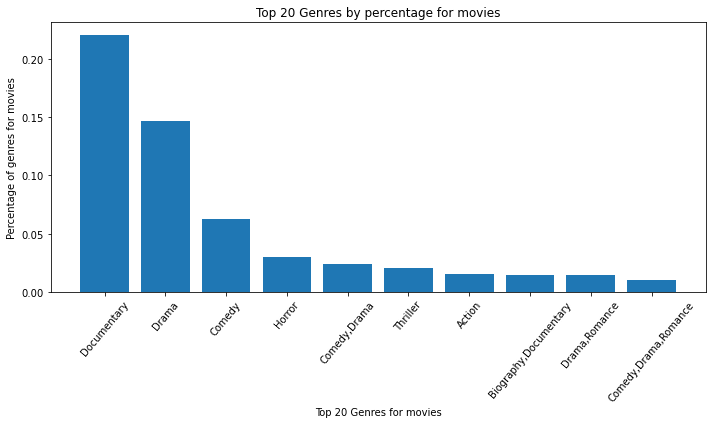

In [10]:
# Top twenty genres

fig, ax = plt.subplots(figsize=(10, 6))

top_20_genres = (pd.read_sql(movie_basics_query, conn)['genres'].value_counts().head(10)/ len(pd.read_sql(movie_basics_query, conn)))

plt.bar(x=top_20_genres.index,
        height=top_20_genres.values
)
plt.xticks(rotation=50)
ax.set_xlabel('Top 20 Genres for movies'),
ax.set_ylabel('Percentage of genres for movies');
ax.set_title('Top 20 Genres by percentage for movies')

plt.tight_layout()

### Explore the bom.movie_gross.csv file:
1. Read the bom.movie_gross.csv
2. Determine the different data types

In [11]:
# create a pandas movie_gross_df 
# read the bom.movie_gross.csv file into the movie_gross_df
# open the movie_gross_df
movie_gross_df = pd.read_csv('bom.movie_gross.csv')
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
# get the enteries and data types in the movie_gross_df
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### movie_gross_df:
1. 3387 rows
2. 5 columns:

       - title column - this is the title of the movie. Has 3387 enteries with no missing values - string/object datatype
       - studio column - the name of the studio where the movie was produced. Has 3382 enteries with 5 missing values - string/object datatype
       - domestic_gross column - the gross revenue generated in the domestic market by the movie. Has 3359 enteries with 28 missing values - float datatype
       - foreign_gross column - the gross revenue generated in the foreign market by the movie. Has 2037 enteries with 1350 missing values. The missing values could mean that the particular movie was not sold in the foreign market- string/object datatype
       - year column - the year when the movie was released. Has 3387 enteries.  - string/object datatype

### Data Cleaning

- there is missing data
- domestic and foreign gross earnings/income are float values - to be converted to integers
- generate a new variable showing the total earnings/incomes as an integer


Identify null/missing values:
- studio - has 5 missing values
- domestic_gross has 28 missing values
- foreign_gross has 1350 missing values

In [13]:
null_values = movie_gross_df.isnull().sum()
print(null_values)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


Convert the domestic and foreign gross income into integers
- first we have to fill all the null values with zero '0'

In [14]:
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(0)
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(0)

In [15]:
null_values = movie_gross_df.isnull().sum()
print(null_values)

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


The domestic and foreign gross income has been filled with 0 and there are no missing values in these two columns
- Convert the variable for domestic_gross and foreign gross into integers
- use the .astype variable, without changing the integrity of the data

In [16]:
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].astype('Int64')
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3387 non-null   Int64 
 3   foreign_gross   3387 non-null   object
 4   year            3387 non-null   int64 
dtypes: Int64(1), int64(1), object(3)
memory usage: 135.7+ KB


domestic_gross variable converted to integer

The foreign_gross has a float values in some of the rows:
- Incomplete conversion due to a string in position 1872 (Unable to parse string "1,131.6" at position 1872). index 1872
- Incomplete conversion due to a string in position 1873 (Unable to parse string "1,019.4" at position 1873). index 1873
- Incomplete conversion due to a string in position 1874 (Unable to parse string "1,163.0" at position 1874). index 1874
- Incomplete conversion due to a string in position 2076 (Unable to parse string "1,010.0" at position 2760). index 2760
- Incomplete conversion due to a string in position 2076 (Unable to parse string "1,369.5" at position 3079). index 3079

First retrieve these rows and view the data,
Then to resolve this, these values in this columns will be replaced with 0

In [17]:
# retrieve the rows with these values:
movie_gross_df[movie_gross_df['foreign_gross'] == '1,131.6']

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000,"1,131.6",2015


In [18]:
movie_gross_df[movie_gross_df['foreign_gross'] == '1,019.4']

,title,studio,domestic_gross,foreign_gross,year
1873,Jurassic World,Uni.,652300000,"1,019.4",2015


In [19]:
movie_gross_df[movie_gross_df['foreign_gross'] == '1,163.0']

,title,studio,domestic_gross,foreign_gross,year
1874,Furious 7,Uni.,353000000,"1,163.0",2015


In [20]:
movie_gross_df[movie_gross_df['foreign_gross'] == '1,369.5']

,title,studio,domestic_gross,foreign_gross,year
3079,Avengers: Infinity War,BV,678800000,"1,369.5",2018


In [21]:
# Change the value in the foreign gross in these rows into 0 using .loc function
movie_gross_df.loc[1872, ['foreign_gross']] = 0
movie_gross_df.loc[1873, ['foreign_gross']] = 0
movie_gross_df.loc[1874, ['foreign_gross']] = 0
movie_gross_df.loc[2760, ['foreign_gross']] = 0
movie_gross_df.loc[3079, ['foreign_gross']] = 0

In [22]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype('int')
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3387 non-null   Int64 
 3   foreign_gross   3387 non-null   int32 
 4   year            3387 non-null   int64 
dtypes: Int64(1), int32(1), int64(1), object(2)
memory usage: 122.5+ KB


In [23]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype('Int64')
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3387 non-null   Int64 
 3   foreign_gross   3387 non-null   Int64 
 4   year            3387 non-null   int64 
dtypes: Int64(2), int64(1), object(2)
memory usage: 139.0+ KB


Create a new column that shows the total revenue for each movie
    - total_gross = domestic_gross + foreign_gross

In [24]:
movie_gross_df['total_gross'] = movie_gross_df['domestic_gross'] + movie_gross_df['foreign_gross']
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000


### Determine if there are outliers
- Use of boxplots

<AxesSubplot:>

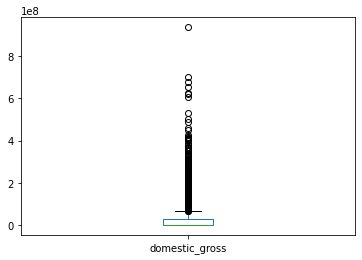

In [25]:
movie_gross_df.boxplot(column=['domestic_gross'], grid = False)

<AxesSubplot:>

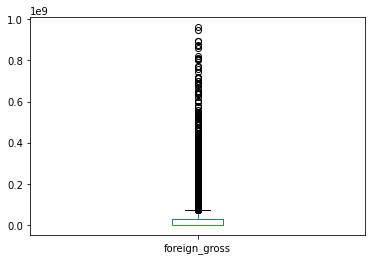

In [26]:
movie_gross_df.boxplot(column=['foreign_gross'], grid = False)

<AxesSubplot:>

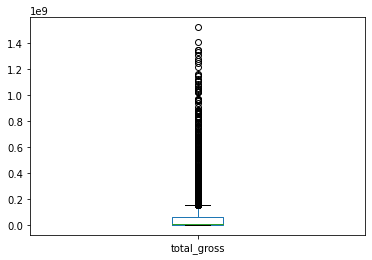

In [27]:
movie_gross_df.boxplot(column=['total_gross'], grid = False)

<AxesSubplot:>

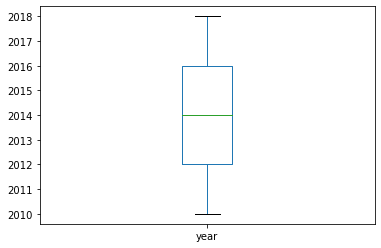

In [28]:
movie_gross_df.boxplot(column=['year'], grid = False)